# Sentiment Clustering

## Setup

### Imports

In [1]:
import json
import sys
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import os
# from datasketch import MinHash, MinHashLSH

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams.update({'font.size': 26})

### Data

In [2]:
# pathToFile = "C:\\Users\\lukas\\Documents\\Waultar\\performance\\"
# fileName = "dataPoints.json"
# dataPointsJson = json.load(open("C:\\Users\\lukas\\Documents\\Waultar\\performance\\dataPoints.json", encoding="utf8"))

def readSentimentData(dataPointNamePath, dataPointCategoryPath):
    dataPointsJson = json.load(open(dataPointNamePath, encoding="utf8"))
    categoriesJson = json.load(open(dataPointCategoryPath, encoding="utf8"))

    x_list = []
    y_list = []
    category_to_point = []
    category_list = []
    count = 0
    sentimentTextCount = 0
    sentimentTextList = []

    for category in categoriesJson:
        category_list.append({'id': category["id"], 'category': category["category"]})

    for point in dataPointsJson:
        count = count + 1
        if point["sentimentScore"] != None and point["sentimentScore"] != -1:
            sentimentTextCount = sentimentTextCount + 1
            sentimentTextList.append(point["sentimentText"])
            x_list.append(count)
            y_list.append(point["sentimentScore"])
            category_to_point.append( \
                list(filter(lambda category: category["id"] == point["category"], category_list)) \
                [0]["category"])

    def unique(list1):
        x = np.array(list1)
        print(np.unique(x))

    print(unique(category_to_point))
    print(len(x_list))

    return DataFrame({'sentiment': y_list, 'category': category_to_point}, \
        columns=['sentiment', 'category'])

## Histogram of data

### Figure Functions

In [3]:
def createHistogram(df, isSave, saveName=""):
    fig = df.hist(bins=[0, .1, .2, .3, .4, .5, .6, .7 ,.8, .9, 1], by='category', \
        legend=True, grid=False, sharex=True, color='#86bf91', rwidth=0.9) \
        .ravel()[0].figure
    
    if isSave:
        fig.tight_layout()
        fig.savefig("img/" + saveName)

### Figures

['Comments' 'Messaging' 'Posts']
None
720
['Comments' 'Messaging' 'Posts']
None
337


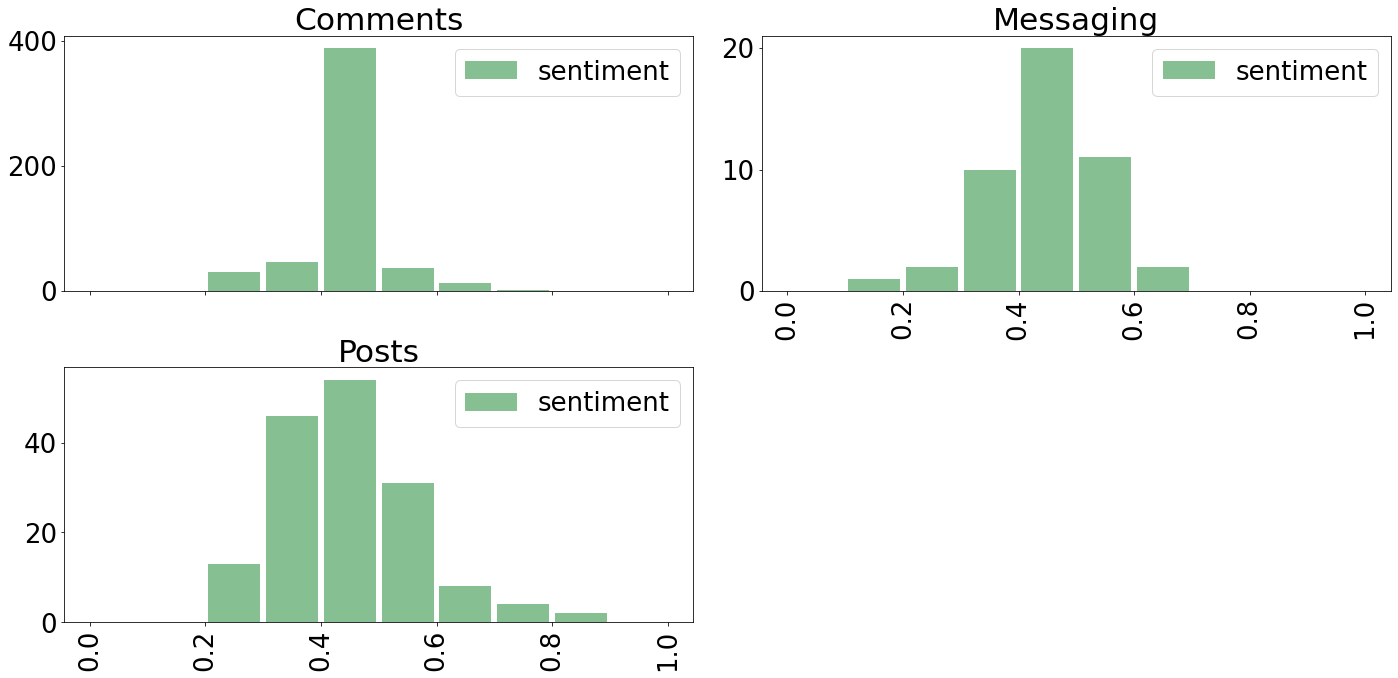

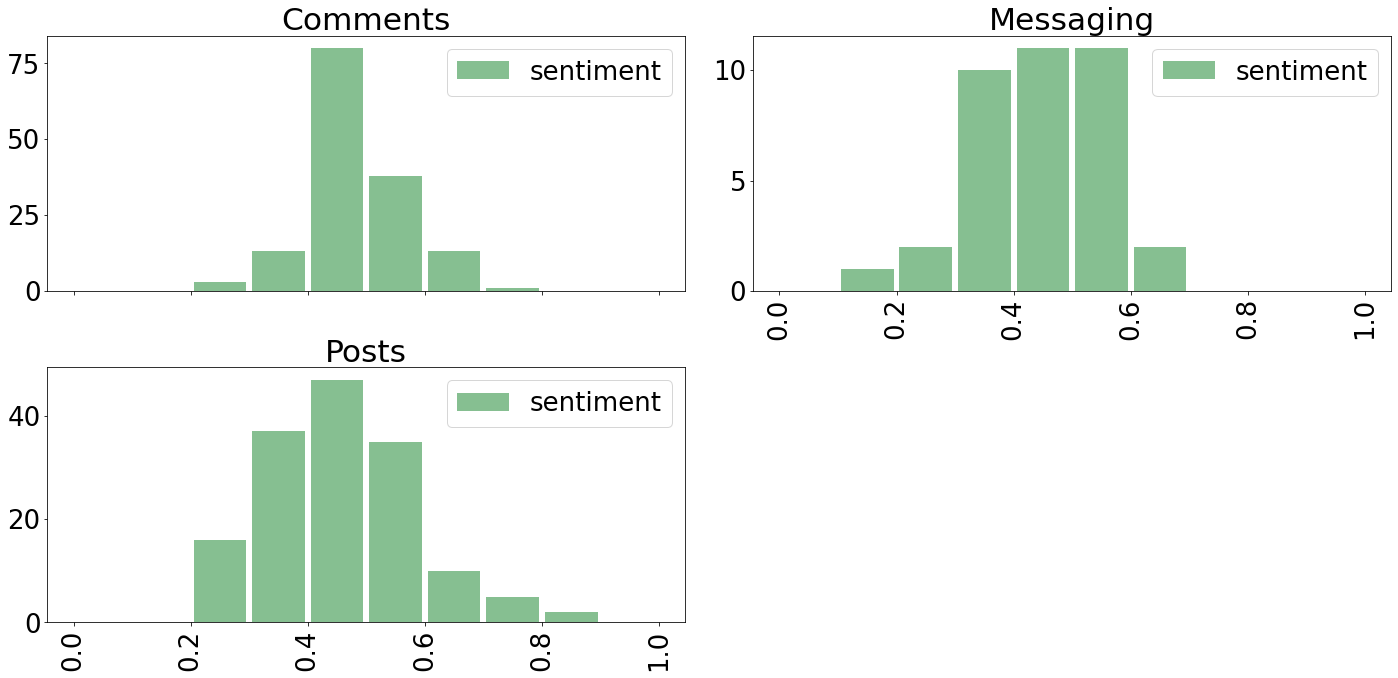

In [4]:
dataFolder ='data/'

rawDf = readSentimentData(dataFolder + "raw-dataPoints.Json", dataFolder + "raw-dataCategories.json")
cleanDf = readSentimentData(dataFolder + "clean-dataPoints.Json", dataFolder + "clean-dataCategories.json")

createHistogram(rawDf, True, saveName="rawSentiment-v0.1.jpg")
createHistogram(cleanDf, True, saveName="cleanSentiment-v0.1.jpg")